In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read the data
df = pd.read_csv('MAP_fractions.csv')
df.columns

Index(['countryIso3', 'country', 'year', 'frac_sought_public',
       'frac_sought_private', 'frac_sought_public_tested',
       'frac_sought_public_untested', 'frac_sought_private_tested',
       'frac_sought_private_untested', 'frac_sought_public_tested_pos',
       'frac_sought_public_tested_neg', 'frac_sought_public_untested_pos',
       'frac_sought_public_untested_neg', 'frac_sought_private_tested_pos',
       'frac_sought_private_tested_neg', 'frac_sought_private_untested_pos',
       'frac_sought_private_untested_neg',
       'frac_sought_public_tested_pos_treated',
       'frac_sought_public_tested_pos_untreated',
       'frac_sought_public_tested_neg_treated',
       'frac_sought_public_tested_neg_untreated',
       'frac_sought_public_untested_pos_treated',
       'frac_sought_public_untested_pos_untreated',
       'frac_sought_public_untested_neg_treated',
       'frac_sought_public_untested_neg_untreated',
       'frac_sought_private_tested_pos_treated',
       'frac_sough

In [2]:
# rename countryIso3 to iso3
df.rename(columns={'countryIso3': 'iso3'}, inplace=True)

In [4]:
# keep the last 5 years
df = df[df['year'] > 2015]

In [10]:
# filter year 2020, sort by descending frac_sought_public, keep frac_sought_public, frac_sought_private, iso3, country, year
iso3_desc = df[df['year'] == 2020].sort_values(by='frac_sought_public', ascending=False)[['iso3']].reset_index(drop=True)
df_ = df[df['year'] == 2020][['frac_sought_public', 'frac_sought_private', 'iso3', 'country']].reset_index(drop=True)

# quantile of df_
qq = df_.quantile([0.0, 0.25, 0.5, 0.75, 1.0])
print(qq)
# find outliers of frac_sought_public
iqr = qq.loc[0.75, 'frac_sought_public'] - qq.loc[0.25, 'frac_sought_public']
outliers = df_[ (df_['frac_sought_public'] < qq.loc[0.25, 'frac_sought_public'] - 1.5 * iqr) | (df_['frac_sought_public'] > qq.loc[0.75, 'frac_sought_public'] + 1.5 * iqr) ]
# remove outliers
# df_ = df_[~df_['iso3'].isin(outliers['iso3'])]
outliers

      frac_sought_public  frac_sought_private
0.00            0.163334             0.060313
0.25            0.552392             0.242310
0.50            0.664179             0.335821
0.75            0.757690             0.447608
1.00            0.939687             0.836666


frac_sought_public  frac_sought_private iso3     country
5            0.163334             0.836666  BGD  Bangladesh

### Fraction of febrile children who sought care

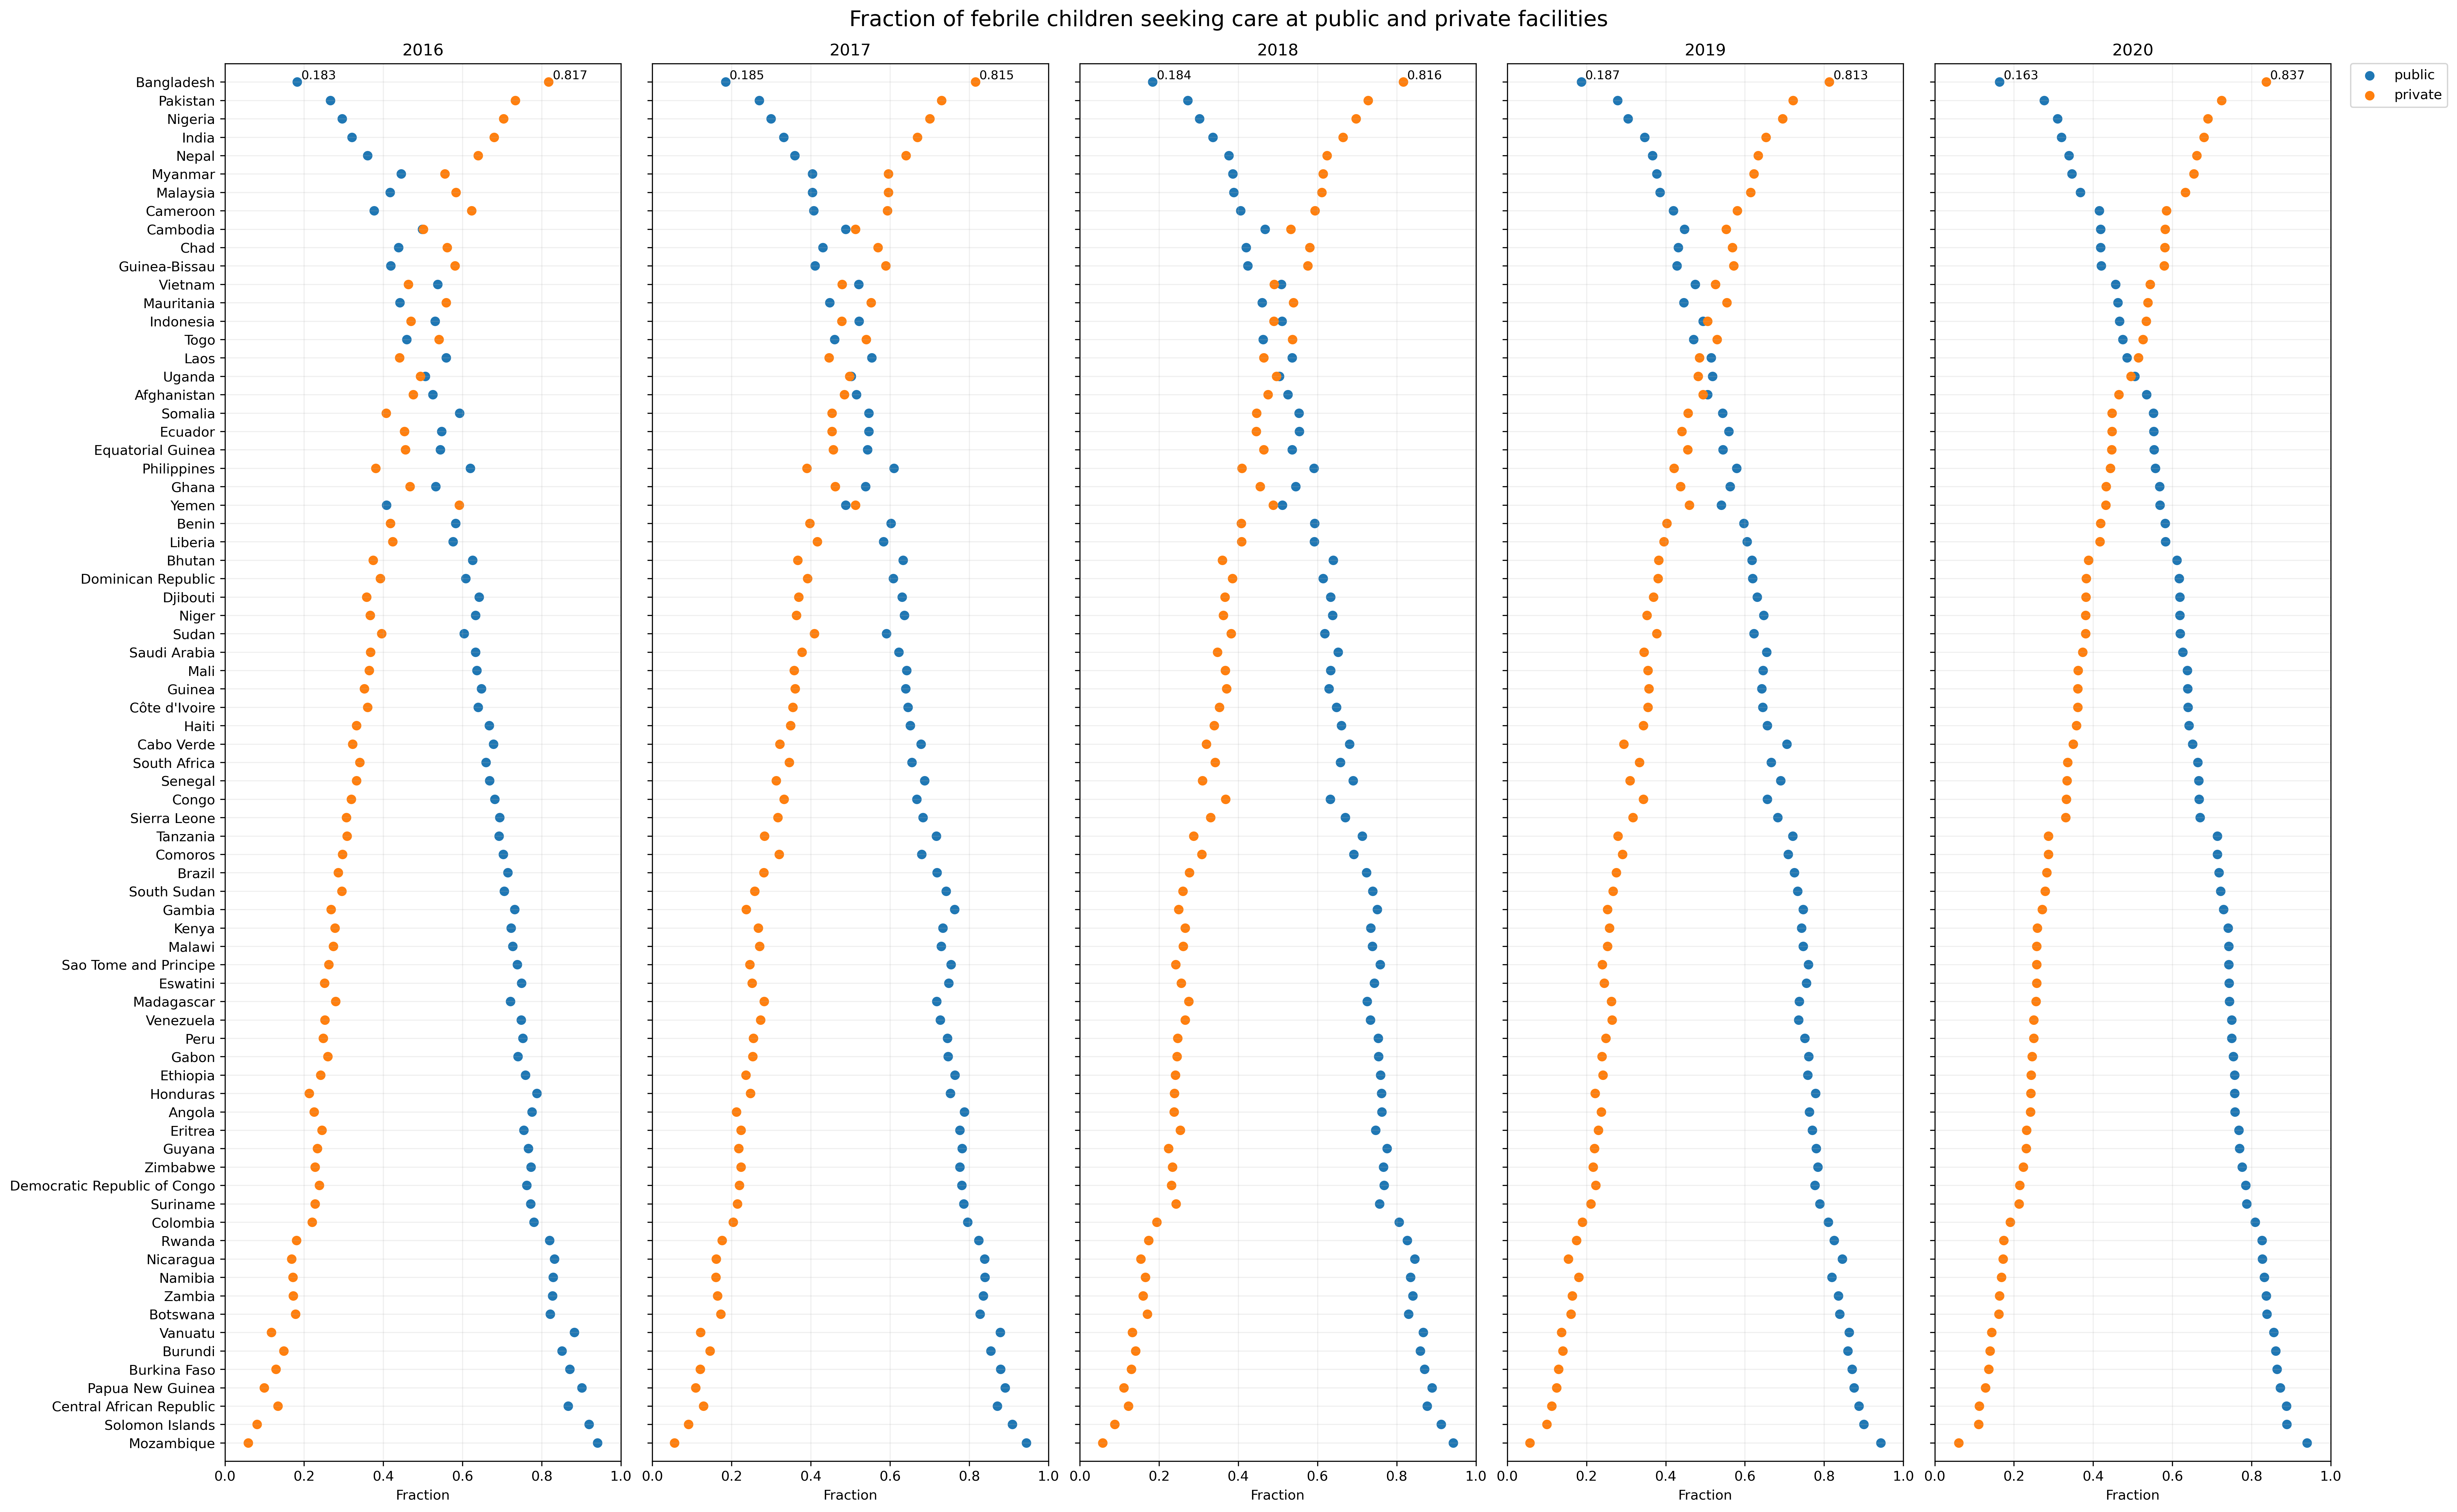

In [72]:
# plot frac_sought_public, frac_sought_private
# 5 columns, 1 row
# each subplot show data of all countries in a given year
# x axis: frac_sought_public in blue, frac_sought_private in orange, range from 0 to 1, scatter points
# y axis: iso3_desc
# title: year
# legend: public, private
# figure suptitle: Fraction of febrile children seeking care at public and private facilities
# figure size: 20, 15
# figure dpi: 300

# create figure
fig, axs = plt.subplots(1, 5, figsize=(25, 15), dpi=300, sharex=True, sharey=True, constrained_layout=True)
# set suptitle
sup_t = fig.suptitle('Fraction of febrile children seeking care at public and private facilities', fontsize=16, y=1.02)

# order of plotting iso3 in y axis
iso3_desc = df[df['year'] == 2020].sort_values(by='frac_sought_public', ascending=False)[['iso3']].reset_index(drop=True)
# loop through each year
for i, year in enumerate(df['year'].unique()):
    # filter data for each year
    df_ = df[df['year'] == year][['frac_sought_public', 'frac_sought_private', 'iso3', 'country']].reset_index(drop=True)
    # sort data by frac_sought_public
    # df_ = df_.sort_values(by='frac_sought_public', ascending=False)
    # sort data by iso3_desc
    df_ = pd.merge(iso3_desc, df_, on='iso3', how='left')#.sort_values(by='index').reset_index(drop=True)
    # plot frac_sought_public
    axs[i].scatter(df_['frac_sought_public'], df_['iso3'], color='tab:blue', label='public')
    # plot frac_sought_private
    axs[i].scatter(df_['frac_sought_private'], df_['iso3'], color='tab:orange', label='private')

    # find outliers of frac_sought_public
    # quantile of df_
    qq = df_.quantile([0.25, 0.5, 0.75])

    for c in ['frac_sought_public', 'frac_sought_private']:
        # iqr
        iqr = qq.loc[0.75, c] - qq.loc[0.25, c]
        # iqr /= 1.5
        # outliers
        outliers = df_[ (df_[c] < qq.loc[0.25, c] - 1.5 * iqr) | (df_[c] > qq.loc[0.75, c] + 1.5 * iqr) ]
        # print(outliers)
        # plot iso3 of outliers
        # axs[i].scatter(outliers['frac_sought_public'], outliers['iso3'], color='tab:red')#, label=outliers['iso3'])
        # write the value frac_sought_public rounded to 1 decimal of outliers on top of their frac_sought_public points
        for j, iso3 in enumerate(outliers['iso3']):
            txt = '{:.3}'.format(outliers.iloc[j][c])
            axs[i].text(outliers.iloc[j][c] + 0.01, outliers.iloc[j]['iso3'], txt , ha='left', va='bottom', color='black', fontsize=9)

    # set title
    axs[i].set_title(year)
    # set x axis label
    axs[i].set_xlabel('Fraction')
    # set y axis label
    # axs[i].set_ylabel('Country')
    # set x axis range
    axs[i].set_xlim(0, 1)
    # set y axis range
    axs[i].set_ylim(-1, len(df_['iso3']))
    # set y axis ticks
    axs[i].set_yticks(np.arange(0, len(df_['iso3']), 1))
    # set y axis tick labels
    axs[i].set_yticklabels(df_['country'])
    # grid
    axs[i].grid(which='both', alpha=0.2)
    
# set legend
lg = axs[-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. )

#save figure
fig.savefig('frac_sought_15_20.pdf', dpi=300, bbox_extra_artists=[sup_t, lg], bbox_inches='tight')

### Fraction of test

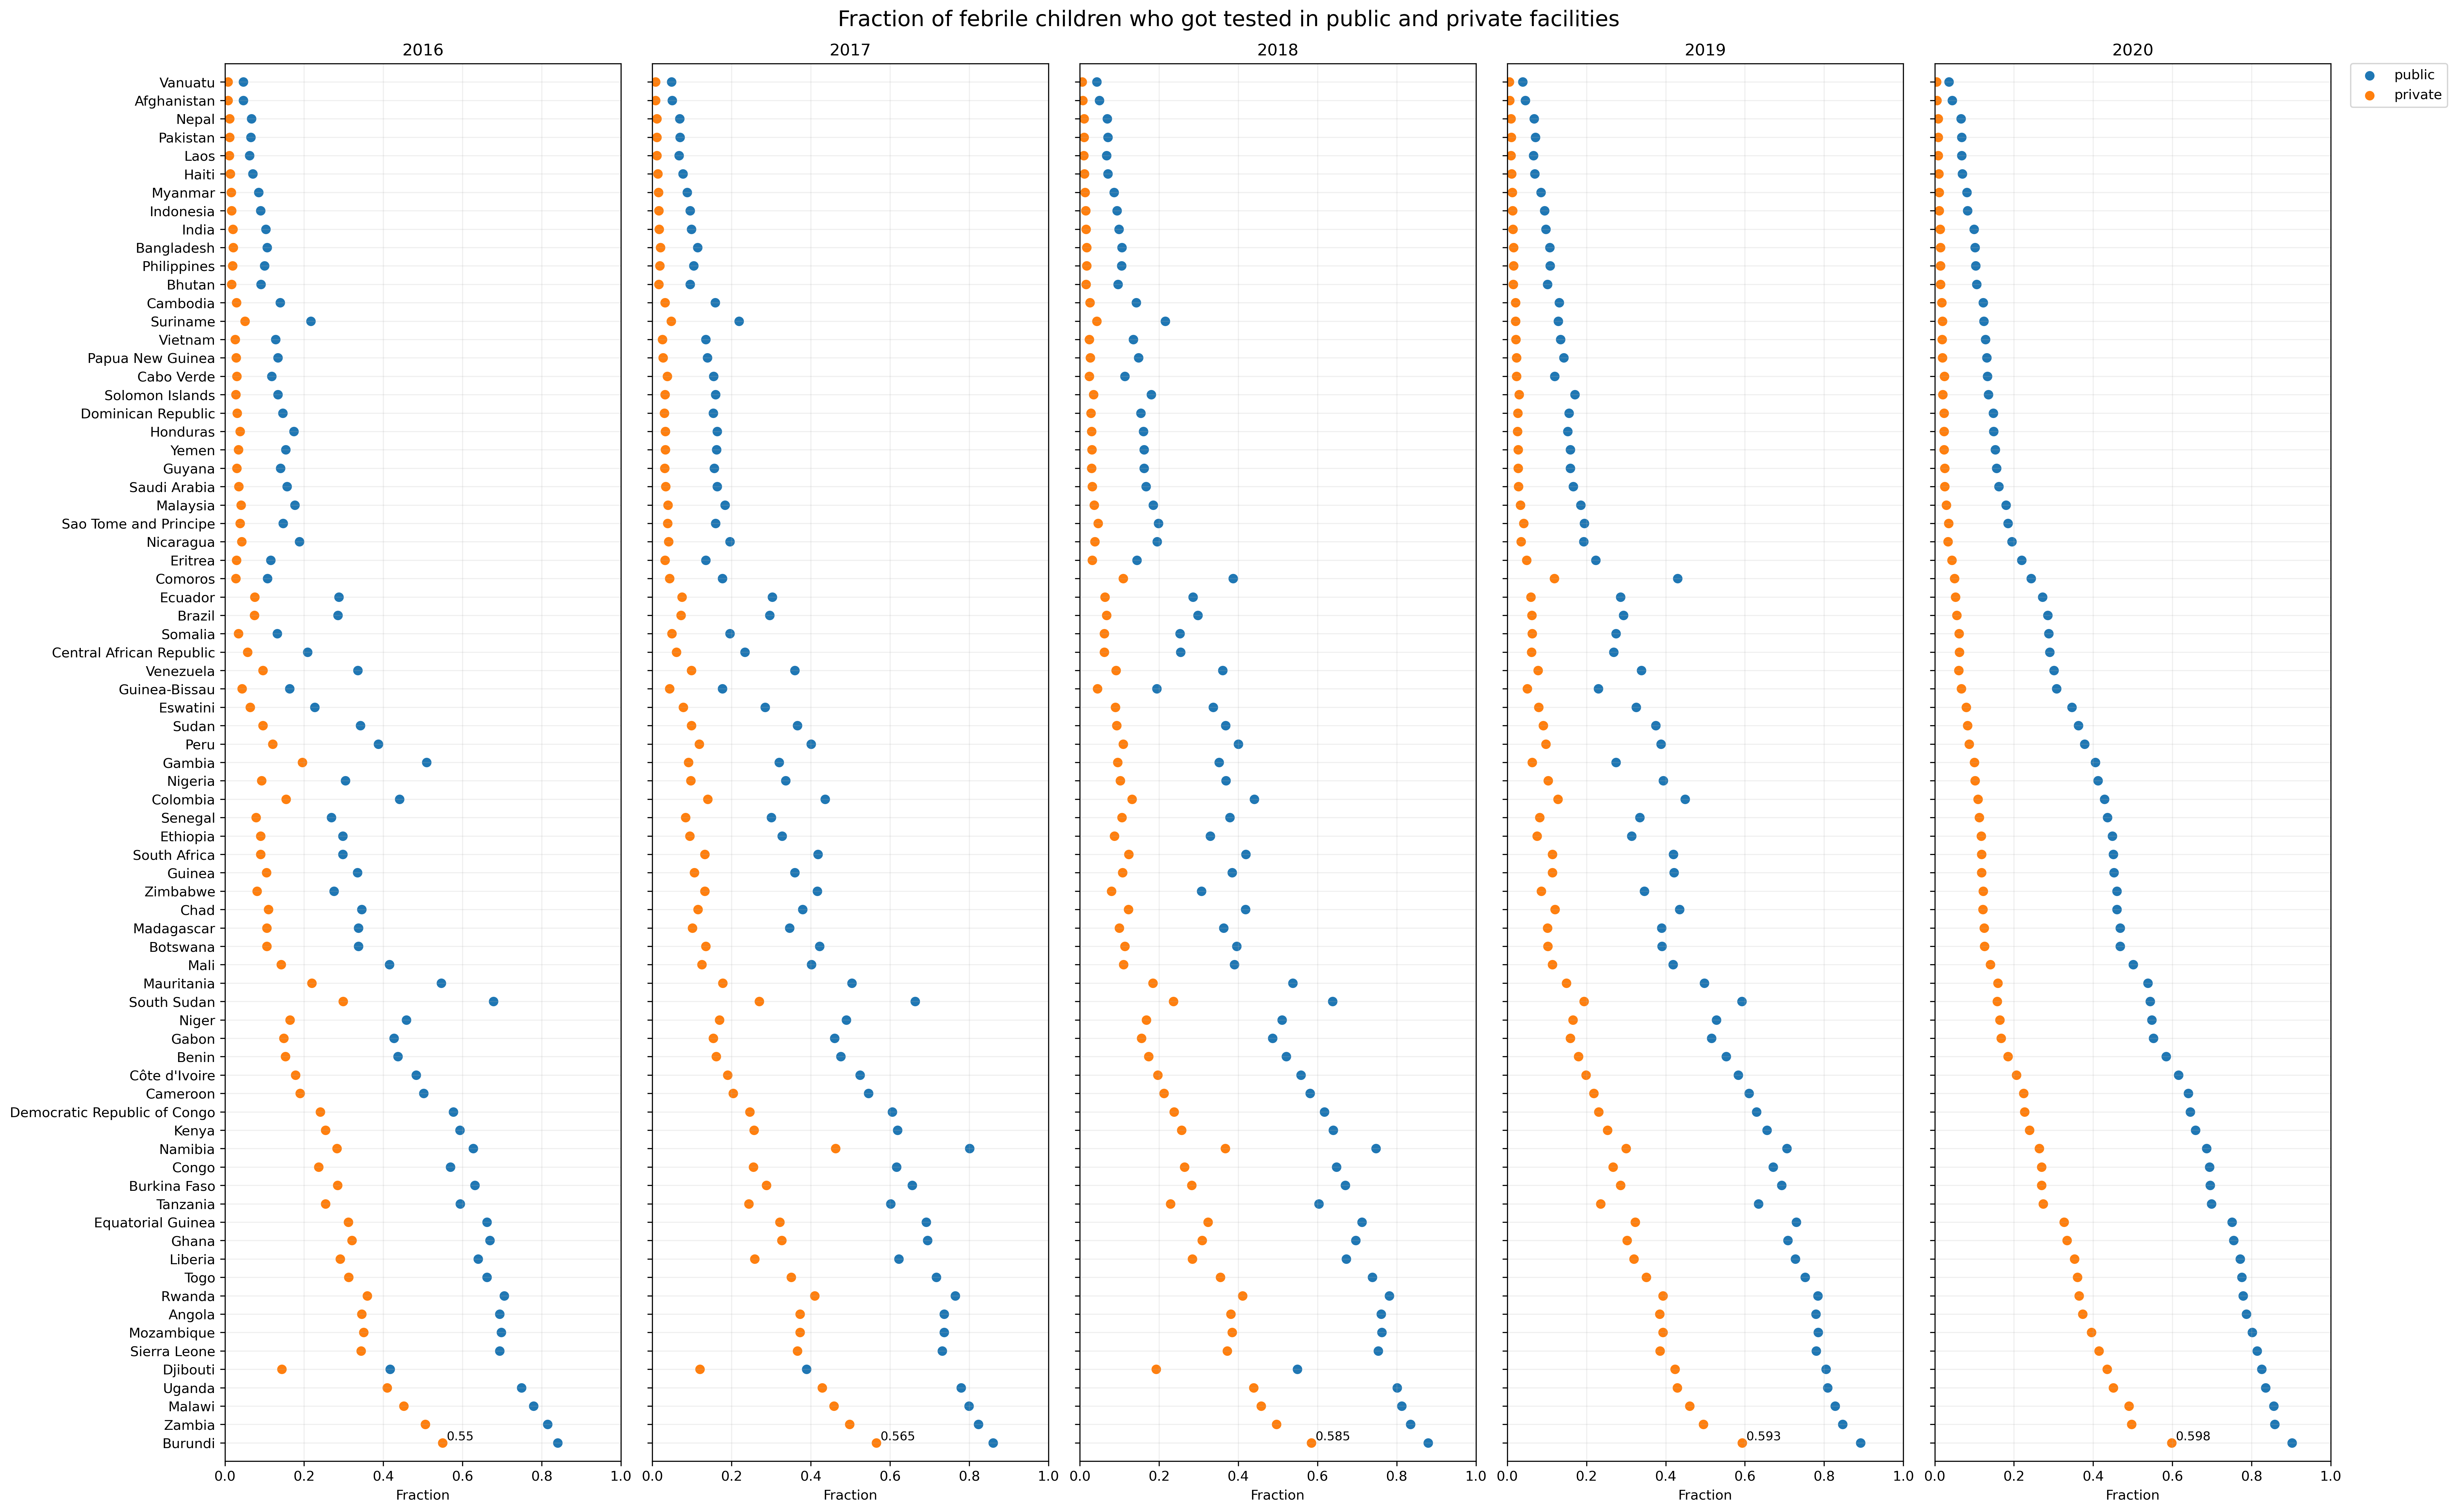

In [73]:
# plot frac_sought_public_tested, frac_sought_public_tested
# 5 columns, 1 row
# each subplot show data of all countries in a given year
# x axis: frac_sought_public in blue, frac_sought_private in orange, range from 0 to 1, scatter points
# y axis: iso3_desc
# title: year
# legend: public, private
# figure suptitle: Fraction of febrile children who got tested in public and private facilities
# figure size: 25, 15
# figure dpi: 300

# create figure
fig, axs = plt.subplots(1, 5, figsize=(25, 15), dpi=300, sharex=True, sharey=True, constrained_layout=True)
# set suptitle
sup_t = fig.suptitle('Fraction of febrile children who got tested in public and private facilities', fontsize=16, y=1.02)

# order of plotting iso3 in y axis
iso3_desc = df[df['year'] == 2020].sort_values(by='frac_sought_public_tested', ascending=False)[['iso3']].reset_index(drop=True)
# loop through each year
for i, year in enumerate(df['year'].unique()):
    # filter data for each year
    df_ = df[df['year'] == year][['frac_sought_public_tested', 'frac_sought_private_tested', 'iso3', 'country']].reset_index(drop=True)
    # sort data by frac_sought_public
    # df_ = df_.sort_values(by='frac_sought_public', ascending=False)
    # sort data by iso3_desc
    df_ = pd.merge(iso3_desc, df_, on='iso3', how='left')#.sort_values(by='index').reset_index(drop=True)
    # plot frac_sought_public_tested
    axs[i].scatter(df_['frac_sought_public_tested'], df_['iso3'], color='tab:blue', label='public')
    # plot frac_sought_private_tested
    axs[i].scatter(df_['frac_sought_private_tested'], df_['iso3'], color='tab:orange', label='private')

    # find outliers of frac_sought_public_tested
    # quantile of df_
    qq = df_.quantile([0.25, 0.5, 0.75])

    for c in ['frac_sought_public_tested', 'frac_sought_private_tested']:
        # iqr
        iqr = qq.loc[0.75, c] - qq.loc[0.25, c]
        # iqr /= 1.5
        # outliers
        outliers = df_[ (df_[c] < qq.loc[0.25, c] - 1.5 * iqr) | (df_[c] > qq.loc[0.75, c] + 1.5 * iqr) ]
        # print(outliers)
        # plot iso3 of outliers
        # axs[i].scatter(outliers['frac_sought_public'], outliers['iso3'], color='tab:red')#, label=outliers['iso3'])
        # write the value frac_sought_public_tested rounded to 1 decimal of outliers on top of their frac_sought_public_tested points
        for j, iso3 in enumerate(outliers['iso3']):
            txt = '{:.3}'.format(outliers.iloc[j][c])
            axs[i].text(outliers.iloc[j][c] + 0.01, outliers.iloc[j]['iso3'], txt , ha='left', va='bottom', color='black', fontsize=9)

    # set title
    axs[i].set_title(year)
    # set x axis label
    axs[i].set_xlabel('Fraction')
    # set y axis label
    # axs[i].set_ylabel('Country')
    # set x axis range
    axs[i].set_xlim(0, 1)
    # set y axis range
    axs[i].set_ylim(-1, len(df_['iso3']))
    # set y axis ticks
    axs[i].set_yticks(np.arange(0, len(df_['iso3']), 1))
    # set y axis tick labels
    axs[i].set_yticklabels(df_['country'])
    # grid
    axs[i].grid(which='both', alpha=0.2)
    
# set legend
lg = axs[-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. )

#save figure
fig.savefig('frac_test_15_20.pdf', dpi=300, bbox_extra_artists=[sup_t, lg], bbox_inches='tight')

### RDT demand

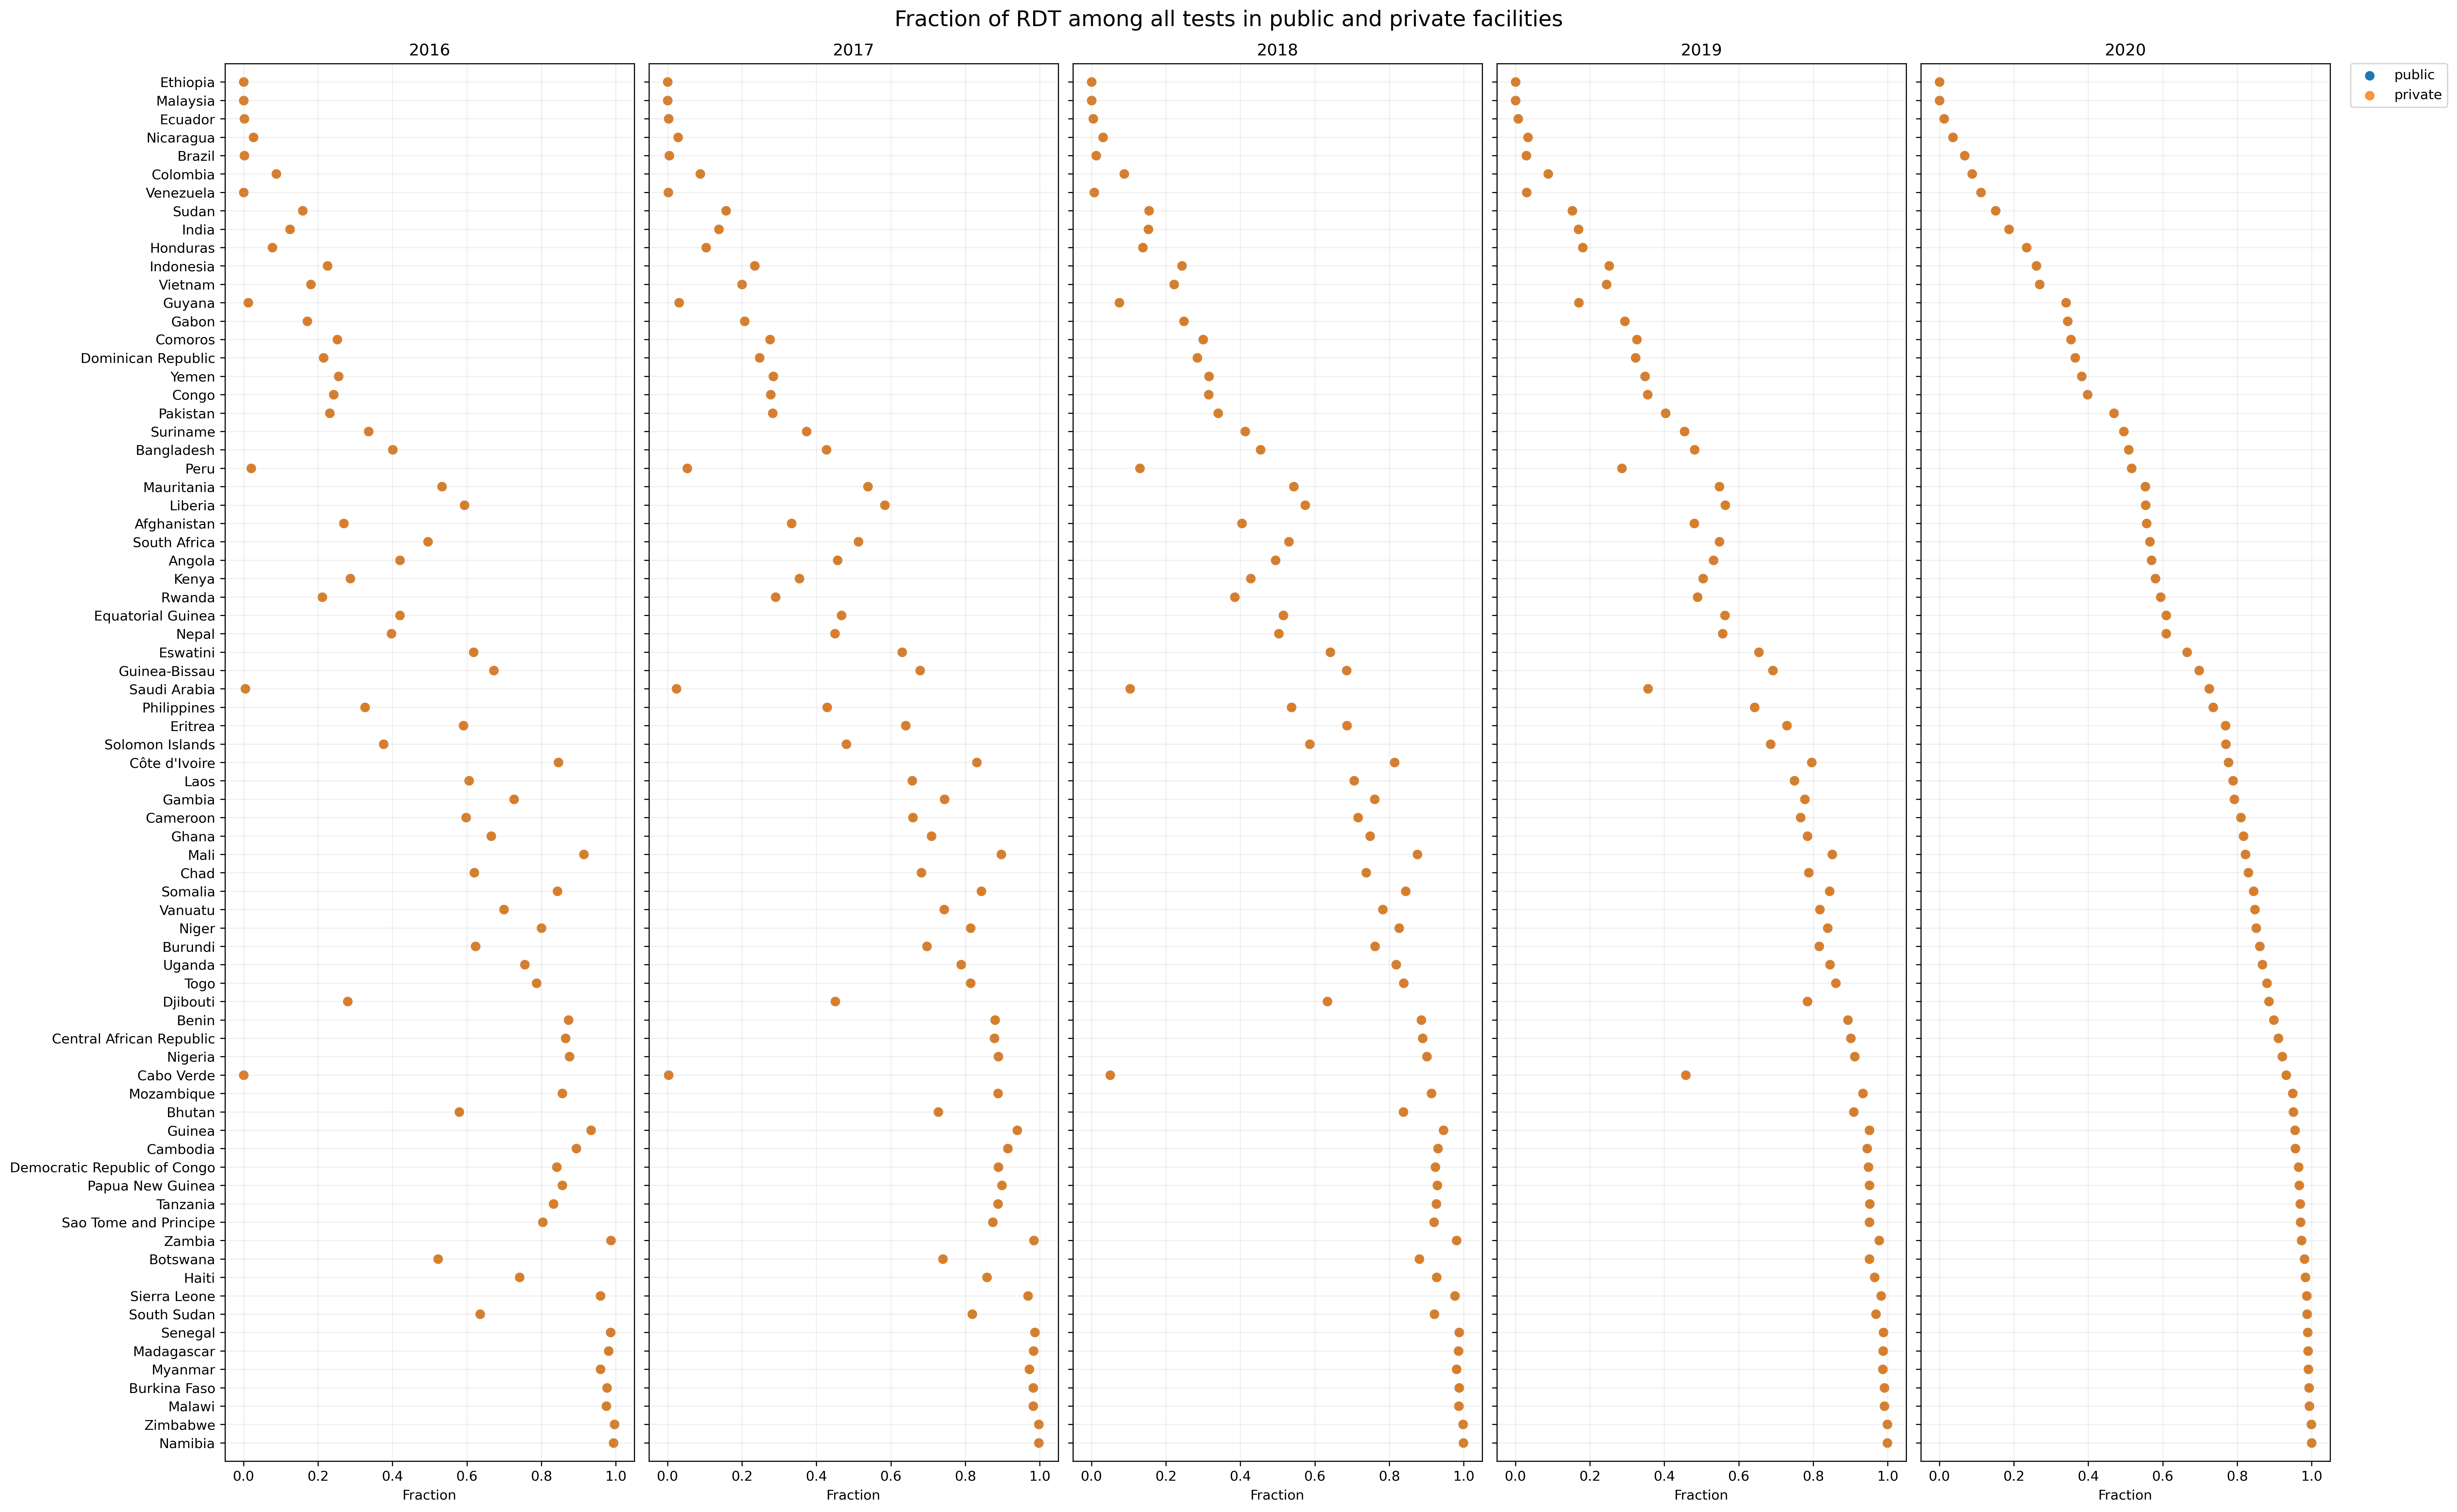

In [74]:
# plot frac_sought_public_tested, frac_sought_public_tested
# 5 columns, 1 row
# each subplot show data of all countries in a given year
# x axis: frac_rdt_public in blue, frac_rdt_private in orange, range from 0 to 1, scatter points
# y axis: iso3_desc
# title: year
# legend: public, private
# figure suptitle: Fraction of RDT among all tests public and private facilities
# figure size: 25, 15
# figure dpi: 300

# create figure
fig, axs = plt.subplots(1, 5, figsize=(25, 15), dpi=300, sharex=True, sharey=True, constrained_layout=True)
# set suptitle
sup_t = fig.suptitle('Fraction of RDT among all tests in public and private facilities', fontsize=16, y=1.02)

# order of plotting iso3 in y axis
iso3_desc = df[df['year'] == 2020].sort_values(by='frac_rdt_public', ascending=False)[['iso3']].reset_index(drop=True)
# loop through each year
for i, year in enumerate(df['year'].unique()):
    # filter data for each year
    df_ = df[df['year'] == year][['frac_rdt_public', 'frac_rdt_private', 'iso3', 'country']].reset_index(drop=True)
    # sort data by frac_sought_public
    # df_ = df_.sort_values(by='frac_sought_public', ascending=False)
    # sort data by iso3_desc
    df_ = pd.merge(iso3_desc, df_, on='iso3', how='left')#.sort_values(by='index').reset_index(drop=True)
    # plot frac_sought_public_tested
    axs[i].scatter(df_['frac_rdt_public'], df_['iso3'], color='tab:blue', label='public')
    # plot frac_sought_private_tested
    axs[i].scatter(df_['frac_rdt_private'], df_['iso3'], color='tab:orange', label='private', alpha=0.8)

    # find outliers of frac_sought_public_tested
    # quantile of df_
    qq = df_.quantile([0.25, 0.5, 0.75])

    for c in ['frac_rdt_public', 'frac_rdt_private']:
        # iqr
        iqr = qq.loc[0.75, c] - qq.loc[0.25, c]
        # iqr /= 1.5
        # outliers
        outliers = df_[ (df_[c] < qq.loc[0.25, c] - 1.5 * iqr) | (df_[c] > qq.loc[0.75, c] + 1.5 * iqr) ]
        # print(outliers)
        # plot iso3 of outliers
        # axs[i].scatter(outliers['frac_sought_public'], outliers['iso3'], color='tab:red')#, label=outliers['iso3'])
        # write the value frac_sought_public_tested rounded to 1 decimal of outliers on top of their frac_sought_public_tested points
        for j, iso3 in enumerate(outliers['iso3']):
            txt = '{:.3}'.format(outliers.iloc[j][c])
            axs[i].text(outliers.iloc[j][c] + 0.01, outliers.iloc[j]['iso3'], txt , ha='left', va='bottom', color='black', fontsize=9)

    # set title
    axs[i].set_title(year)
    # set x axis label
    axs[i].set_xlabel('Fraction')
    # set y axis label
    # axs[i].set_ylabel('Country')
    # set x axis range
    # axs[i].set_xlim(0, 1)
    # set y axis range
    axs[i].set_ylim(-1, len(df_['iso3']))
    # set y axis ticks
    axs[i].set_yticks(np.arange(0, len(df_['iso3']), 1))
    # set y axis tick labels
    axs[i].set_yticklabels(df_['country'])
    # grid
    axs[i].grid(which='both', alpha=0.2)
    
# set legend
lg = axs[-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. )

#save figure
fig.savefig('frac_rdt_15_20.pdf', dpi=300, bbox_extra_artists=[sup_t, lg], bbox_inches='tight')

### ACT demand

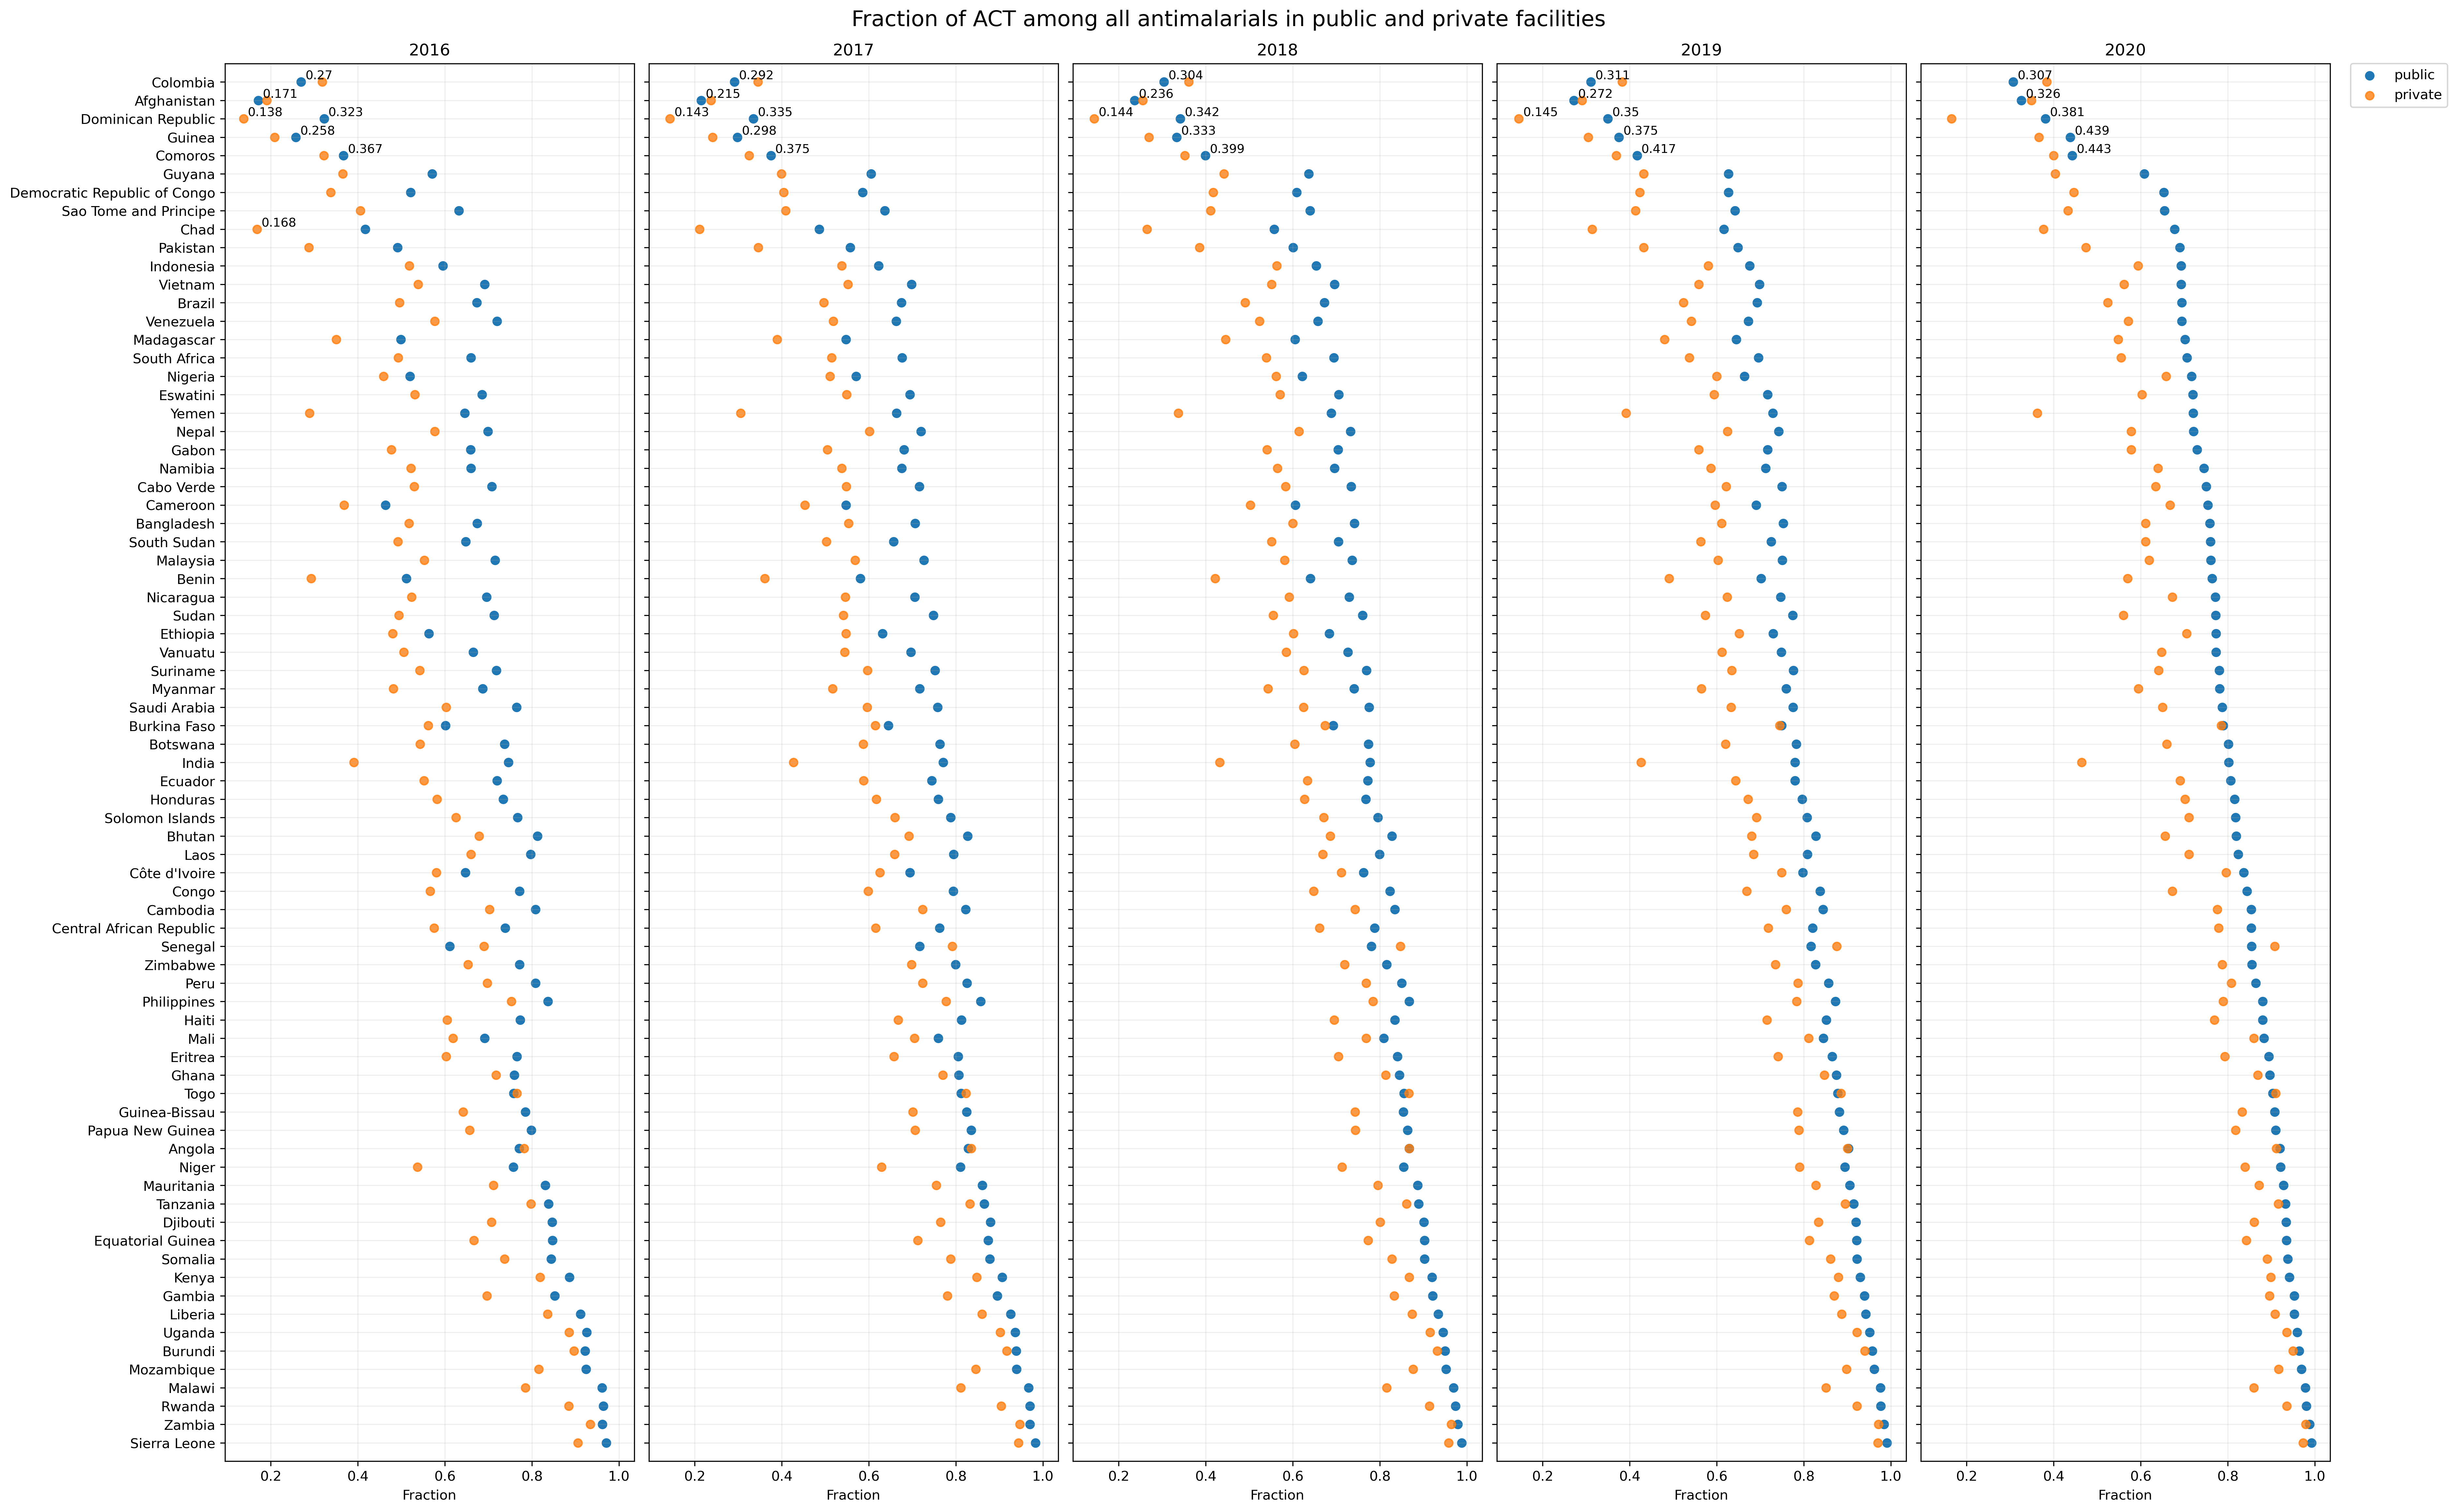

In [75]:
# plot frac_sought_public_tested, frac_sought_public_tested
# 5 columns, 1 row
# each subplot show data of all countries in a given year
# x axis: frac_rdt_public in blue, frac_rdt_private in orange, range from 0 to 1, scatter points
# y axis: iso3_desc
# title: year
# legend: public, private
# figure suptitle: Fraction of ACT among all antimalarials in public and private facilities
# figure size: 25, 15
# figure dpi: 300

# create figure
fig, axs = plt.subplots(1, 5, figsize=(25, 15), dpi=300, sharex=True, sharey=True, constrained_layout=True)
# set suptitle
sup_t = fig.suptitle('Fraction of ACT among all antimalarials in public and private facilities', fontsize=16, y=1.02)

# order of plotting iso3 in y axis
iso3_desc = df[df['year'] == 2020].sort_values(by='frac_act_public', ascending=False)[['iso3']].reset_index(drop=True)
# loop through each year
for i, year in enumerate(df['year'].unique()):
    # filter data for each year
    df_ = df[df['year'] == year][['frac_act_public', 'frac_act_private', 'iso3', 'country']].reset_index(drop=True)
    # sort data by iso3_desc
    df_ = pd.merge(iso3_desc, df_, on='iso3', how='left')
    # plot frac_sought_public_tested
    axs[i].scatter(df_['frac_act_public'], df_['iso3'], color='tab:blue', label='public')
    # plot frac_sought_private_tested
    axs[i].scatter(df_['frac_act_private'], df_['iso3'], color='tab:orange', label='private', alpha=0.8)

    # find outliers of frac_sought_public_tested
    # quantile of df_
    qq = df_.quantile([0.25, 0.5, 0.75])

    for c in ['frac_act_public', 'frac_act_private']:
        # iqr
        iqr = qq.loc[0.75, c] - qq.loc[0.25, c]
        # iqr /= 1.5
        # outliers
        outliers = df_[ (df_[c] < qq.loc[0.25, c] - 1.5 * iqr) | (df_[c] > qq.loc[0.75, c] + 1.5 * iqr) ]
        # print(outliers)
        # plot iso3 of outliers
        # axs[i].scatter(outliers['frac_sought_public'], outliers['iso3'], color='tab:red')#, label=outliers['iso3'])
        # write the value frac_sought_public_tested rounded to 1 decimal of outliers on top of their frac_sought_public_tested points
        for j, iso3 in enumerate(outliers['iso3']):
            txt = '{:.3}'.format(outliers.iloc[j][c])
            axs[i].text(outliers.iloc[j][c] + 0.01, outliers.iloc[j]['iso3'], txt , ha='left', va='bottom', color='black', fontsize=9)

    # set title
    axs[i].set_title(year)
    # set x axis label
    axs[i].set_xlabel('Fraction')
    # set y axis label
    # axs[i].set_ylabel('Country')
    # set x axis range
    # axs[i].set_xlim(0, 1)
    # set y axis range
    axs[i].set_ylim(-1, len(df_['iso3']))
    # set y axis ticks
    axs[i].set_yticks(np.arange(0, len(df_['iso3']), 1))
    # set y axis tick labels
    axs[i].set_yticklabels(df_['country'])
    # grid
    axs[i].grid(which='both', alpha=0.2)
    
# set legend
lg = axs[-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. )

#save figure
fig.savefig('frac_act_15_20.pdf', dpi=300, bbox_extra_artists=[sup_t, lg], bbox_inches='tight')

### Treatment rate for cases with positive test results

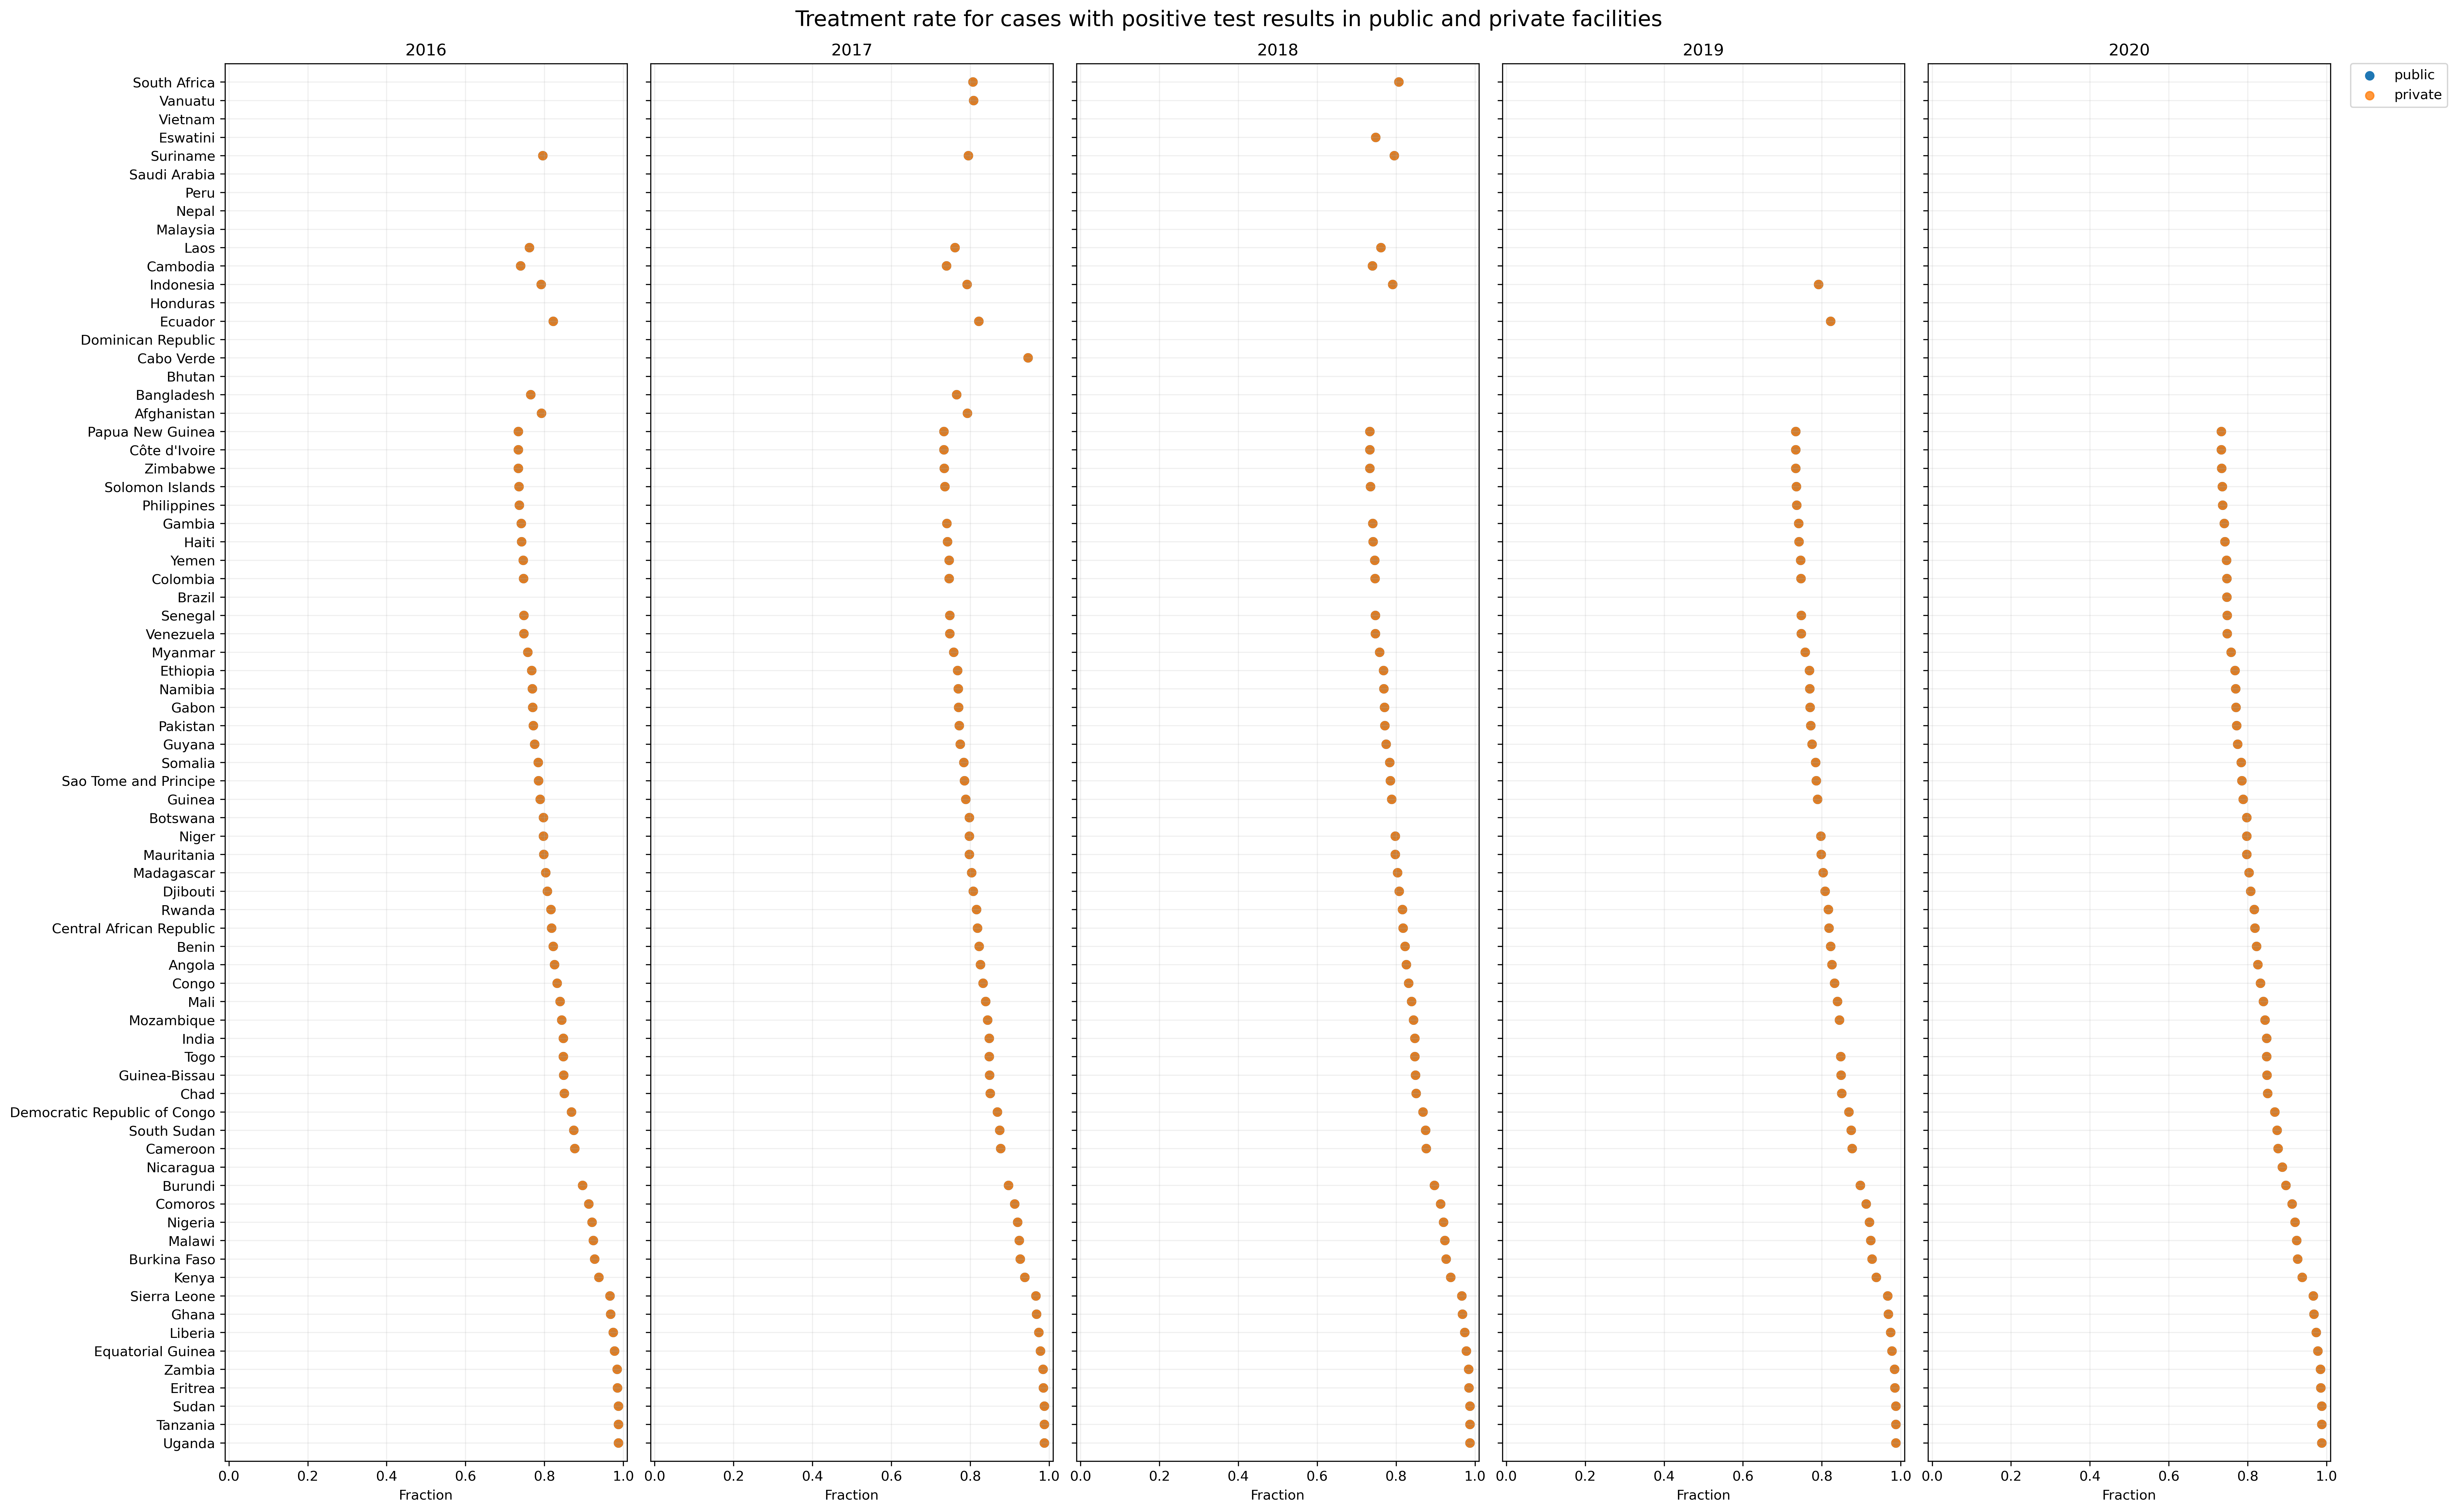

In [76]:
# plot frac_sought_public_tested_pos_treated, frac_sought_private_tested_pos_treated
# 5 columns, 1 row
# each subplot show data of all countries in a given year
# x axis: frac_sought_public_tested_pos_treated in blue, frac_sought_private_tested_pos_treated in orange, range from 0 to 1, scatter points
# y axis: iso3_desc
# title: year
# legend: public, private
# figure suptitle: Treatment rate for cases with positive test results in public and private facilities
# figure size: 25, 15
# figure dpi: 300

# create figure
fig, axs = plt.subplots(1, 5, figsize=(25, 15), dpi=300, sharex=True, sharey=True, constrained_layout=True)
# set suptitle
sup_t = fig.suptitle('Treatment rate for cases with positive test results in public and private facilities', fontsize=16, y=1.02)

# order of plotting iso3 in y axis
iso3_desc = df[df['year'] == 2020].sort_values(by='frac_sought_public_tested_pos_treated', ascending=False)[['iso3']].reset_index(drop=True)
# loop through each year
for i, year in enumerate(df['year'].unique()):
    # filter data for each year
    df_ = df[df['year'] == year][['frac_sought_public_tested_pos_treated', 'frac_sought_private_tested_pos_treated', 'iso3', 'country']].reset_index(drop=True)
    # sort data by iso3_desc
    df_ = pd.merge(iso3_desc, df_, on='iso3', how='left')
    # plot frac_sought_public_tested
    axs[i].scatter(df_['frac_sought_public_tested_pos_treated'], df_['iso3'], color='tab:blue', label='public')
    # plot frac_sought_private_tested
    axs[i].scatter(df_['frac_sought_private_tested_pos_treated'], df_['iso3'], color='tab:orange', label='private', alpha=0.8)

    # find outliers of frac_sought_public_tested
    # quantile of df_
    qq = df_.quantile([0.25, 0.5, 0.75])

    for c in ['frac_sought_public_tested_pos_treated', 'frac_sought_private_tested_pos_treated']:
        # iqr
        iqr = qq.loc[0.75, c] - qq.loc[0.25, c]
        # iqr /= 1.5
        # outliers
        outliers = df_[ (df_[c] < qq.loc[0.25, c] - 1.5 * iqr) | (df_[c] > qq.loc[0.75, c] + 1.5 * iqr) ]
        # print(outliers)
        # plot iso3 of outliers
        # axs[i].scatter(outliers['frac_sought_public'], outliers['iso3'], color='tab:red')#, label=outliers['iso3'])
        # write the value frac_sought_public_tested rounded to 1 decimal of outliers on top of their frac_sought_public_tested points
        for j, iso3 in enumerate(outliers['iso3']):
            txt = '{:.3}'.format(outliers.iloc[j][c])
            axs[i].text(outliers.iloc[j][c] + 0.01, outliers.iloc[j]['iso3'], txt , ha='left', va='bottom', color='black', fontsize=9)

    # set title
    axs[i].set_title(year)
    # set x axis label
    axs[i].set_xlabel('Fraction')
    # set y axis label
    # axs[i].set_ylabel('Country')
    # set x axis range
    axs[i].set_xlim(-0.01, 1.01)
    # set y axis range
    axs[i].set_ylim(-1, len(df_['iso3']))
    # set y axis ticks
    axs[i].set_yticks(np.arange(0, len(df_['iso3']), 1))
    # set y axis tick labels
    axs[i].set_yticklabels(df_['country'])
    # grid
    axs[i].grid(which='both', alpha=0.2)
    
# set legend
lg = axs[-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. )

#save figure
fig.savefig('frac_pos_treat_15_20.pdf', dpi=300, bbox_extra_artists=[sup_t, lg], bbox_inches='tight')

### Untreatment rate for cases with negative test results

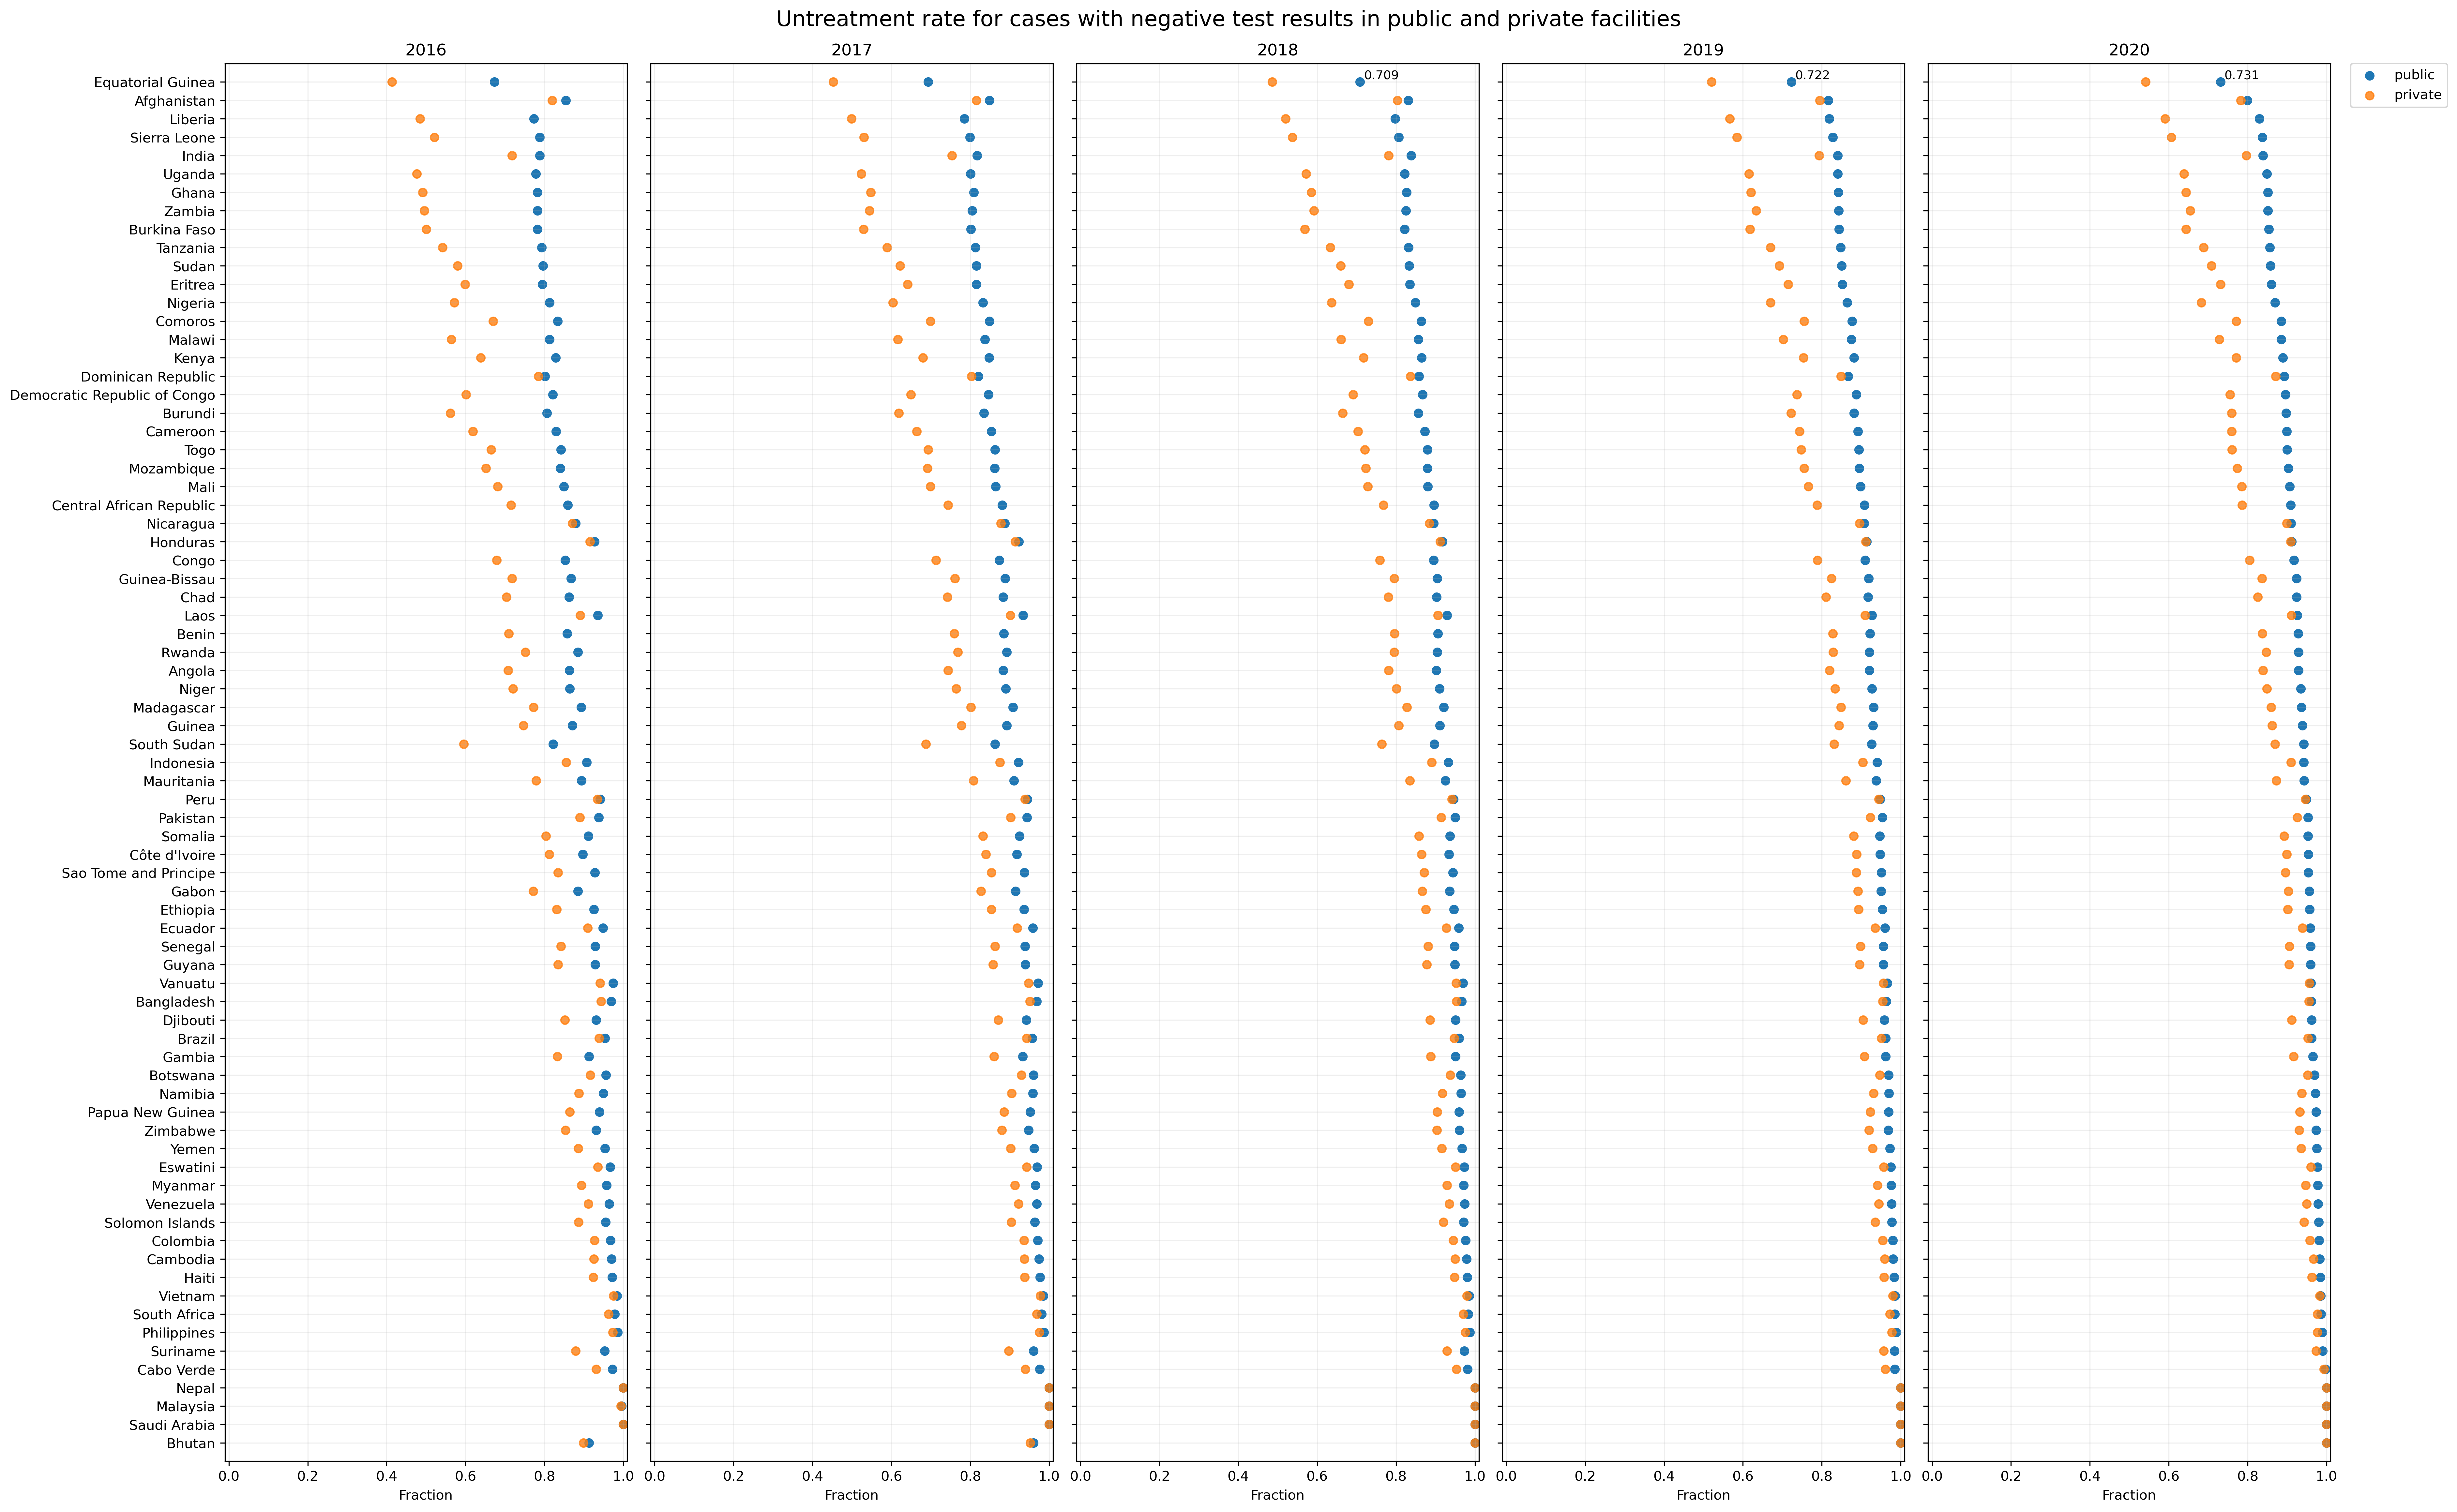

In [77]:
# plot frac_sought_public_tested_neg_untreated, frac_sought_private_tested_neg_untreated
# 5 columns, 1 row
# each subplot show data of all countries in a given year
# x axis: frac_sought_public_tested_pos_treated in blue, frac_sought_private_tested_pos_treated in orange, range from 0 to 1, scatter points
# y axis: iso3_desc
# title: year
# legend: public, private
# figure suptitle: Untreatment rate for cases with negative test results in public and private facilities
# figure size: 25, 15
# figure dpi: 300

# create figure
fig, axs = plt.subplots(1, 5, figsize=(25, 15), dpi=300, sharex=True, sharey=True, constrained_layout=True)
# set suptitle
sup_t = fig.suptitle('Untreatment rate for cases with negative test results in public and private facilities', fontsize=16, y=1.02)

# order of plotting iso3 in y axis
iso3_desc = df[df['year'] == 2020].sort_values(by='frac_sought_public_tested_neg_untreated', ascending=False)[['iso3']].reset_index(drop=True)
# loop through each year
for i, year in enumerate(df['year'].unique()):
    # filter data for each year
    df_ = df[df['year'] == year][['frac_sought_public_tested_neg_untreated', 'frac_sought_private_tested_neg_untreated', 'iso3', 'country']].reset_index(drop=True)
    # sort data by iso3_desc
    df_ = pd.merge(iso3_desc, df_, on='iso3', how='left')
    # plot frac_sought_public_tested
    axs[i].scatter(df_['frac_sought_public_tested_neg_untreated'], df_['iso3'], color='tab:blue', label='public')
    # plot frac_sought_private_tested
    axs[i].scatter(df_['frac_sought_private_tested_neg_untreated'], df_['iso3'], color='tab:orange', label='private', alpha=0.8)

    # find outliers of frac_sought_public_tested
    # quantile of df_
    qq = df_.quantile([0.25, 0.5, 0.75])

    for c in ['frac_sought_public_tested_neg_untreated', 'frac_sought_private_tested_neg_untreated']:
        # iqr
        iqr = qq.loc[0.75, c] - qq.loc[0.25, c]
        # iqr /= 1.5
        # outliers
        outliers = df_[ (df_[c] < qq.loc[0.25, c] - 1.5 * iqr) | (df_[c] > qq.loc[0.75, c] + 1.5 * iqr) ]
        # print(outliers)
        # plot iso3 of outliers
        # axs[i].scatter(outliers['frac_sought_public'], outliers['iso3'], color='tab:red')#, label=outliers['iso3'])
        # write the value frac_sought_public_tested rounded to 1 decimal of outliers on top of their frac_sought_public_tested points
        for j, iso3 in enumerate(outliers['iso3']):
            txt = '{:.3}'.format(outliers.iloc[j][c])
            axs[i].text(outliers.iloc[j][c] + 0.01, outliers.iloc[j]['iso3'], txt , ha='left', va='bottom', color='black', fontsize=9)

    # set title
    axs[i].set_title(year)
    # set x axis label
    axs[i].set_xlabel('Fraction')
    # set y axis label
    # axs[i].set_ylabel('Country')
    # set x axis range
    axs[i].set_xlim(-0.01, 1.01)
    # set y axis range
    axs[i].set_ylim(-1, len(df_['iso3']))
    # set y axis ticks
    axs[i].set_yticks(np.arange(0, len(df_['iso3']), 1))
    # set y axis tick labels
    axs[i].set_yticklabels(df_['country'])
    # grid
    axs[i].grid(which='both', alpha=0.2)
    
# set legend
lg = axs[-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. )

#save figure
fig.savefig('frac_neg_untreat_15_20.pdf', dpi=300, bbox_extra_artists=[sup_t, lg], bbox_inches='tight')

In [63]:
df[df['year'] == 2017][['frac_sought_public_tested_neg_untreated', 'frac_sought_private_tested_neg_untreated', 'iso3', 'country']].quantile([0.25, 0.5, 0.75])

frac_sought_public_tested_neg_untreated  \
0.25                                 0.851433   
0.50                                 0.918292   
0.75                                 0.960403   

      frac_sought_private_tested_neg_untreated  
0.25                                  0.695985  
0.50                                  0.839520  
0.75                                  0.916774

In [64]:
0.851433-1.5*(0.960403-0.851433)

0.687978

In [65]:
df[(df['year'] == 2017) & df['country'].str.contains('Equato') ][['frac_sought_public_tested_neg_untreated', 'frac_sought_private_tested_neg_untreated', 'iso3', 'country']]

frac_sought_public_tested_neg_untreated  \
304                                 0.693785   

     frac_sought_private_tested_neg_untreated iso3            country  
304                                  0.452562  GNQ  Equatorial Guinea

### Treatment rate for cases with no test results

In [70]:
df['frac_sought_public_untested_treated'] = (df['frac_sought_public_untested_pos_treated'] + df['frac_sought_public_untested_neg_treated'])/2
df['frac_sought_private_untested_treated'] = (df['frac_sought_private_untested_pos_treated'] + df['frac_sought_private_untested_neg_treated'])/2

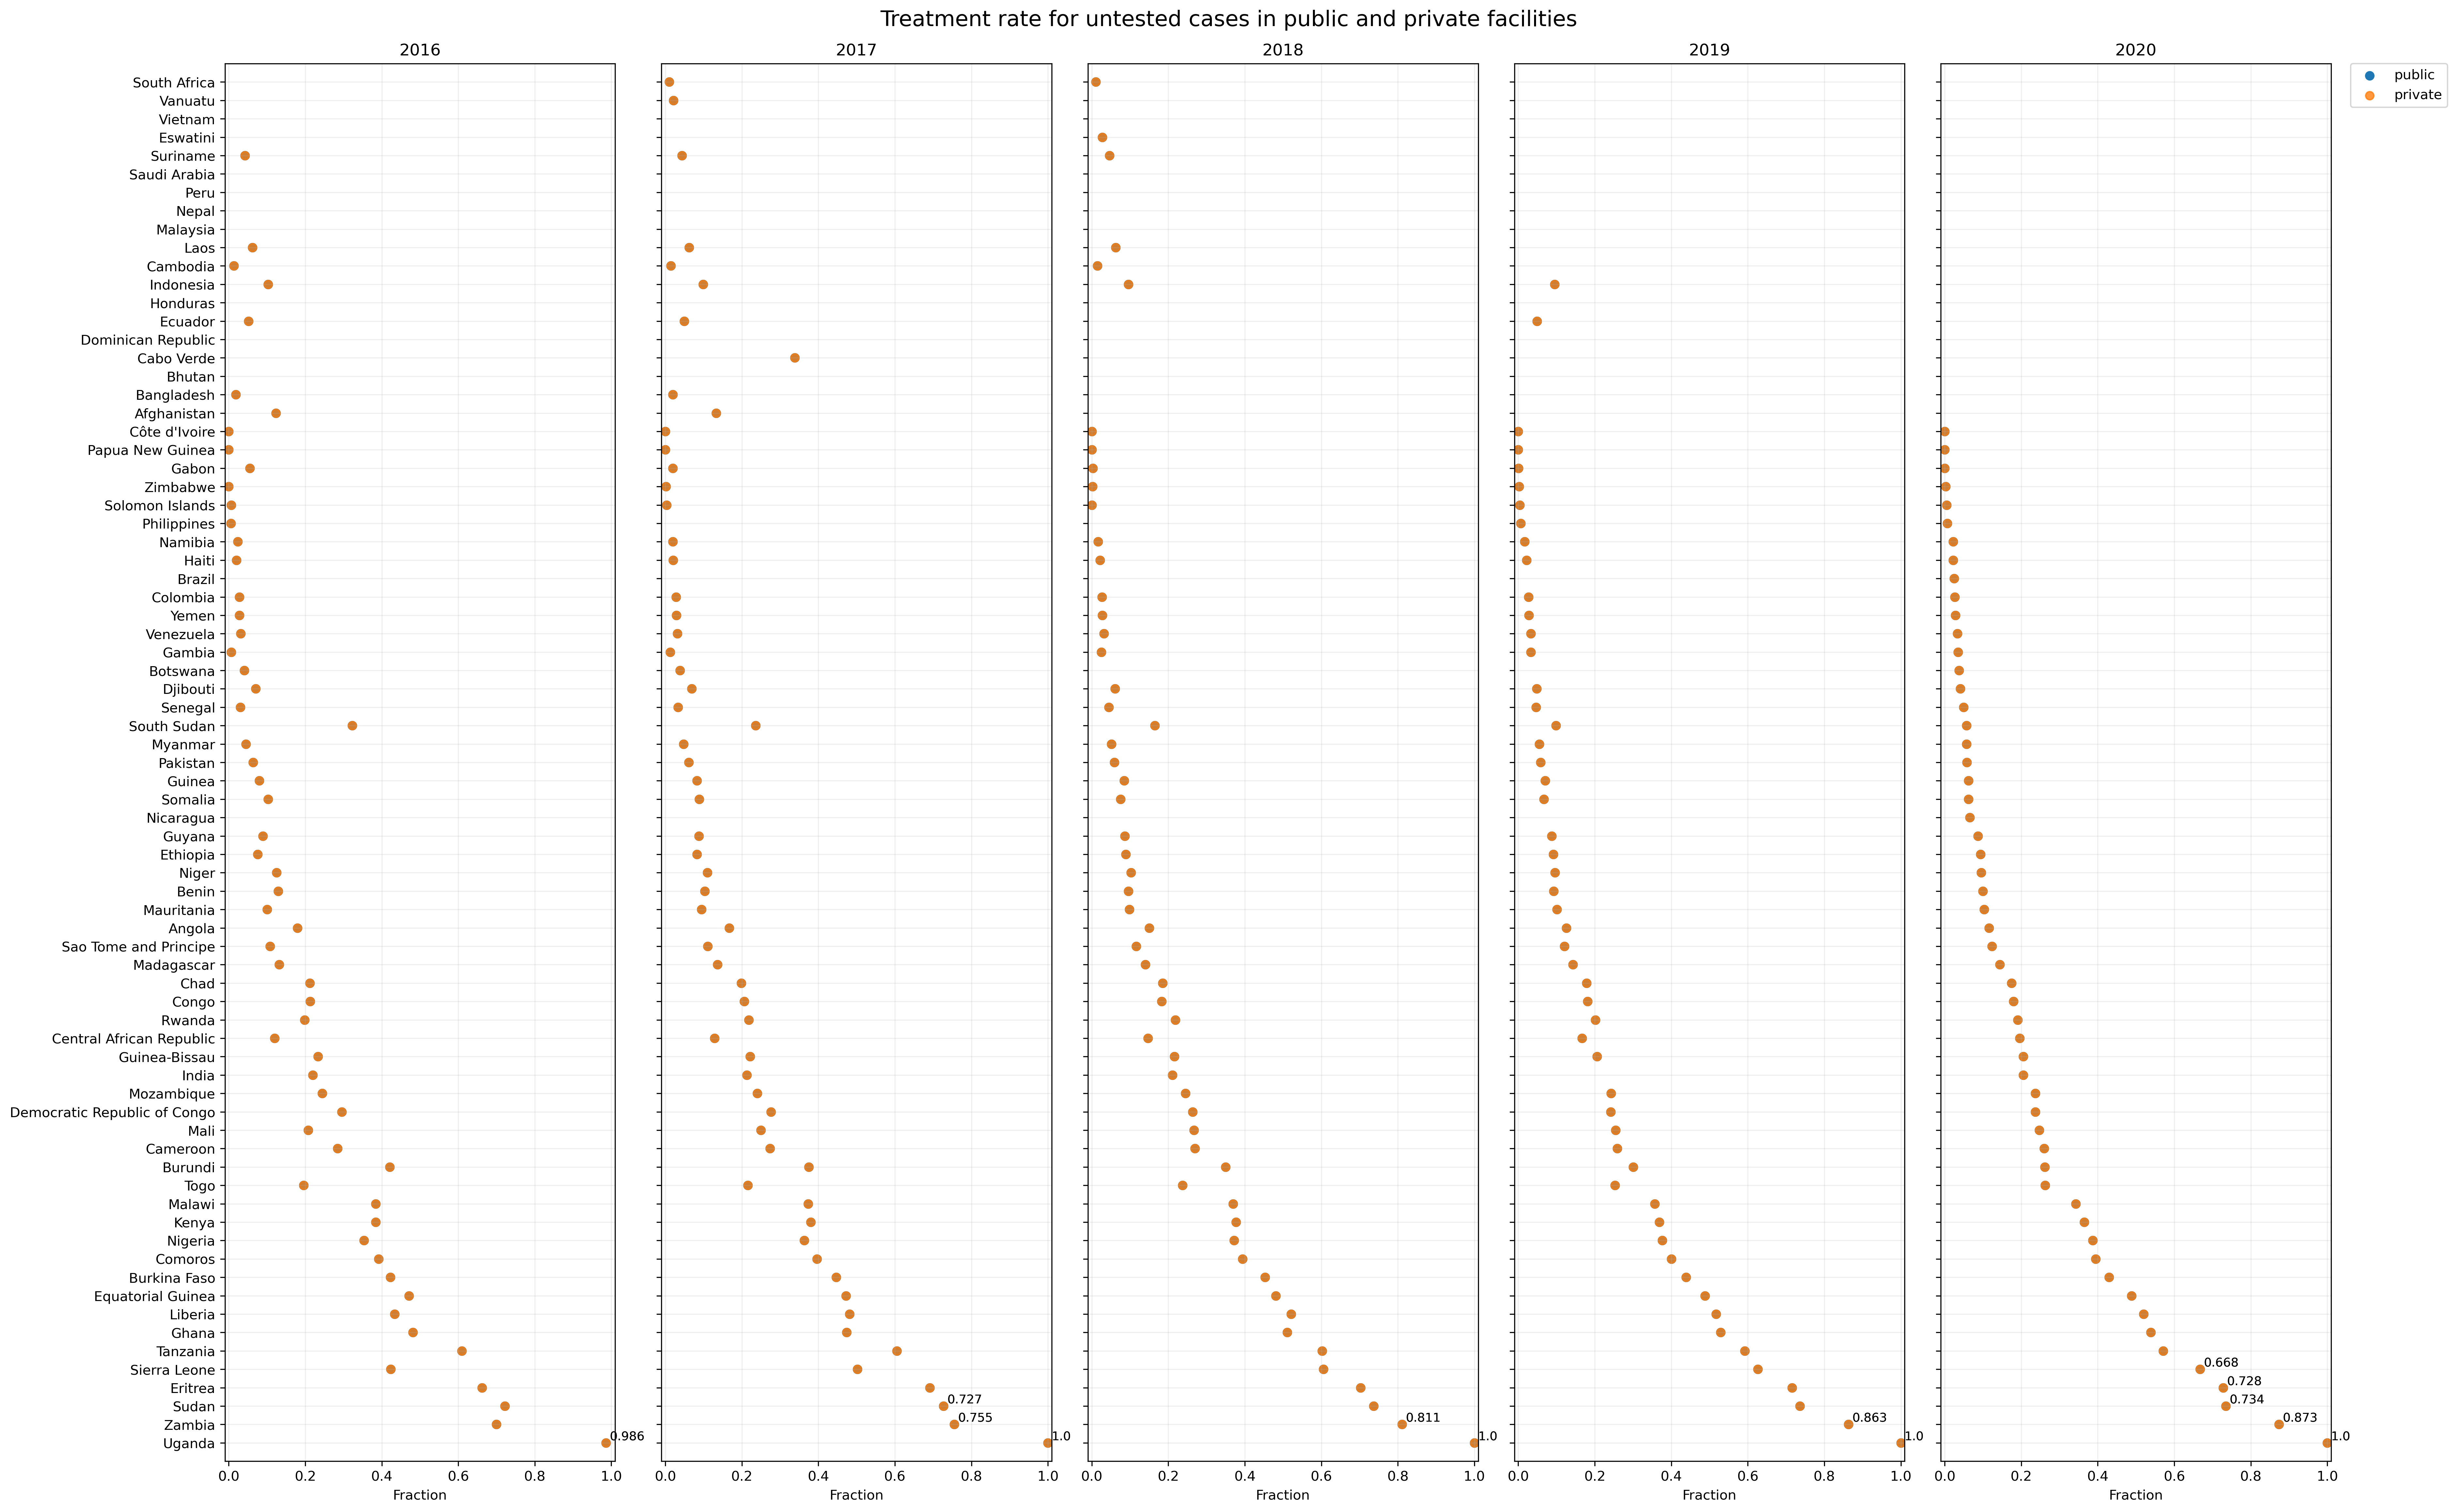

In [78]:
# plot frac_sought_public_untested_treated, frac_sought_private_untested_treated
# 5 columns, 1 row
# each subplot show data of all countries in a given year
# x axis: frac_sought_public_untested_treated in blue, frac_sought_private_untested_treated in orange, range from 0 to 1, scatter points
# y axis: iso3_desc
# title: year
# legend: public, private
# figure suptitle: Treatment rate for untested cases in public and private facilities
# figure size: 25, 15
# figure dpi: 300

# create figure
fig, axs = plt.subplots(1, 5, figsize=(25, 15), dpi=300, sharex=True, sharey=True, constrained_layout=True)
# set suptitle
sup_t = fig.suptitle('Treatment rate for untested cases in public and private facilities', fontsize=16, y=1.02)

# order of plotting iso3 in y axis
iso3_desc = df[df['year'] == 2020].sort_values(by='frac_sought_public_untested_treated', ascending=False)[['iso3']].reset_index(drop=True)
# loop through each year
for i, year in enumerate(df['year'].unique()):
    # filter data for each year
    df_ = df[df['year'] == year][['frac_sought_public_untested_treated', 'frac_sought_private_untested_treated', 'iso3', 'country']].reset_index(drop=True)
    # sort data by iso3_desc
    df_ = pd.merge(iso3_desc, df_, on='iso3', how='left')
    # plot frac_sought_public_tested
    axs[i].scatter(df_['frac_sought_public_untested_treated'], df_['iso3'], color='tab:blue', label='public')
    # plot frac_sought_private_tested
    axs[i].scatter(df_['frac_sought_private_untested_treated'], df_['iso3'], color='tab:orange', label='private', alpha=0.8)

    # find outliers of frac_sought_public_tested
    # quantile of df_
    qq = df_.quantile([0.25, 0.5, 0.75])

    for c in ['frac_sought_public_untested_treated', 'frac_sought_private_untested_treated']:
        # iqr
        iqr = qq.loc[0.75, c] - qq.loc[0.25, c]
        # iqr /= 1.5
        # outliers
        outliers = df_[ (df_[c] < qq.loc[0.25, c] - 1.5 * iqr) | (df_[c] > qq.loc[0.75, c] + 1.5 * iqr) ]
        # print(outliers)
        # plot iso3 of outliers
        # axs[i].scatter(outliers['frac_sought_public'], outliers['iso3'], color='tab:red')#, label=outliers['iso3'])
        # write the value frac_sought_public_tested rounded to 1 decimal of outliers on top of their frac_sought_public_tested points
        for j, iso3 in enumerate(outliers['iso3']):
            txt = '{:.3}'.format(outliers.iloc[j][c])
            axs[i].text(outliers.iloc[j][c] + 0.01, outliers.iloc[j]['iso3'], txt , ha='left', va='bottom', color='black', fontsize=9)

    # set title
    axs[i].set_title(year)
    # set x axis label
    axs[i].set_xlabel('Fraction')
    # set y axis label
    # axs[i].set_ylabel('Country')
    # set x axis range
    axs[i].set_xlim(-0.01, 1.01)
    # set y axis range
    axs[i].set_ylim(-1, len(df_['iso3']))
    # set y axis ticks
    axs[i].set_yticks(np.arange(0, len(df_['iso3']), 1))
    # set y axis tick labels
    axs[i].set_yticklabels(df_['country'])
    # grid
    axs[i].grid(which='both', alpha=0.2)
    
# set legend
lg = axs[-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. )

#save figure
fig.savefig('frac_untest_treat_15_20.pdf', dpi=300, bbox_extra_artists=[sup_t, lg], bbox_inches='tight')